In [24]:
import pandas as pd
import numpy as np
from scipy import stats
import sys
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [25]:
train=pd.read_csv('../1. Task and Data/train.csv',sep='|')
test=pd.read_csv('../1. Task and Data/test.csv',sep='|')

Data Preparation: Add features to the data set

In [26]:
train['totalScanTimeInMinutes'] = train['totalScanTimeInSeconds'] / 60.0
train['scannedLineItems'] = train['scannedLineItemsPerSecond'] * train['totalScanTimeInSeconds']
train['pricePerScannedLineItem'] = train['grandTotal'] / train['scannedLineItems']
train['scansWithoutRegistrationPerScannedLineItem'] = train['scansWithoutRegistration'] / train['scannedLineItems']
train['quantityModificationsPerScannedLineItem'] = train['quantityModifications'] / train['scannedLineItems']
train['lineItemVoidsPerSecond'] = train['lineItemVoids'] / train['totalScanTimeInSeconds']
train['scansWithoutRegistrationPerSecond'] = train['scansWithoutRegistration'] / train['totalScanTimeInSeconds']
train['quantityModificationsPerSecond'] = train['quantityModifications'] / train['totalScanTimeInSeconds']
train['secondsPerEuro'] = train['totalScanTimeInSeconds'] / train['grandTotal']
train['lineItemVoidsPerEuro'] = train['lineItemVoids'] / train['grandTotal']
train['scansWithoutRegistrationPerEuro'] = train['scansWithoutRegistration'] / train['grandTotal']
train['quantityModificationsPerEuro'] = train['quantityModifications'] / train['grandTotal']

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Y= train['fraud']
X= train.drop('fraud',axis=1)
x_train, x_holdout, y_train, y_holdout = train_test_split(X, Y, test_size=0, random_state=324)

model= DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes=6)
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=6, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

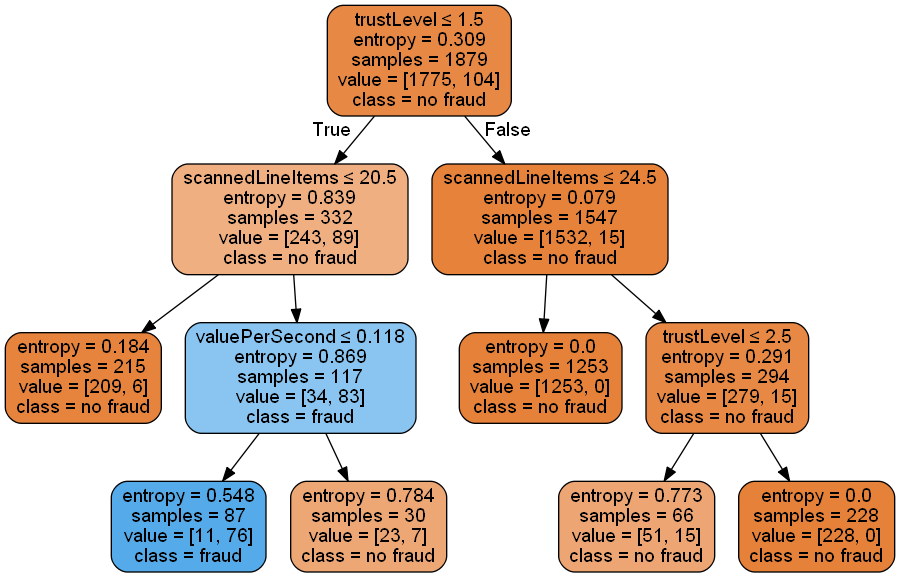

In [30]:
features = list(train.columns.values)
features.remove('fraud')
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = features, class_names=list(['no fraud', 'fraud']))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png("Decision Tree.png")
Image(graph.create_png())